In [1]:
import numpy as np
from PIL import Image

In [2]:
def process_grayscale_image(image_path, target_size=(60, 60)):
    # Step 1: Load the image and convert to grayscale
    image = Image.open(image_path).convert("L")  # "L" mode converts the image to grayscale
    
    # Step 2: Resize the image
    image_resized = image.resize(target_size)
    
    # Step 3: Convert the image to a numpy matrix
    image_matrix = np.array(image_resized)
    
    # Step 4: Vectorize the image
    image_vector = image_matrix.flatten()
    
    return image_matrix, image_vector

# Example usage
image_path = 'cat1.jpeg'  # Replace with your black-and-white image path
matrix, vector = process_grayscale_image(image_path)

print(f"Grayscale Image Matrix Shape: {matrix.shape}")  # e.g., (960, 960)
print(f"Grayscale Image Vector Length: {len(vector)}")  # e.g., 960*960

# Example usage
image_path = 'dog.jpg'  # Replace with your black-and-white image path
matrix_d, vector_d = process_grayscale_image(image_path)


Grayscale Image Matrix Shape: (60, 60)
Grayscale Image Vector Length: 3600


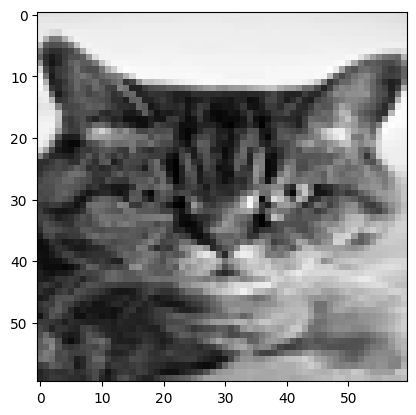

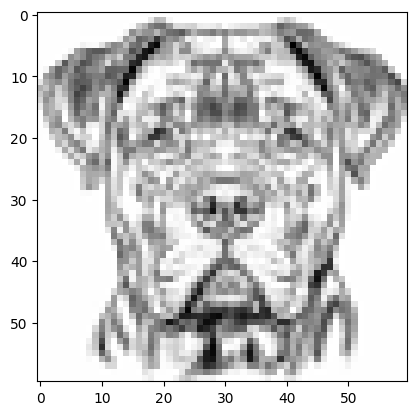

In [3]:
#invert matrix
inverse = np.invert(matrix)

#plot matrix as image
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray')
plt.show()
plt.imshow(matrix_d, cmap='gray')
plt.show()


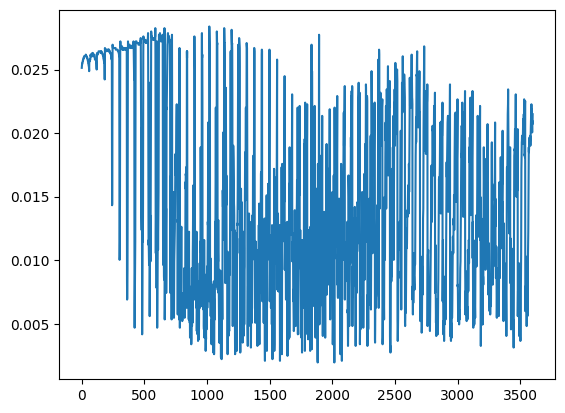

In [4]:
vector
norm_vec = (vector/np.linalg.norm(vector) )
dog_vec = (vector_d/np.linalg.norm(vector_d) )
#plot vector of the cat
plt.plot(norm_vec)    
plt.show()


In [5]:
norm_vec= norm_vec+0j
dog_vec= dog_vec+0j

In [6]:
def gen_base(H, V, dx, dy, wavelength, f):

    """

    gen_base - Function to generate a structured grid (meshgrid) and related parameters.

    Parameters:

        H (int): Number of horizontal grid points (columns).

        V (int): Number of vertical grid points (rows).

        dx (float): Grid spacing in the horizontal direction (x-axis).

        dy (float): Grid spacing in the vertical direction (y-axis).

        wavelength (float): Wavelength of interest (not used directly in this function but passed for flexibility).

        f (float): Focal length (not used directly in this function but passed for flexibility).

    Returns:

        dict: A dictionary containing spatial and frequency domain mesh grids, grid spacings, and polar coordinates.

    """

    # Generate the spatial domain grid points for y (vertical axis)

    y = np.linspace(-(V / 2), (V / 2) - 1, V) * dy  # Scaled by vertical spacing (dy)

    # Generate the spatial domain grid points for x (horizontal axis)

    x = np.linspace(-(H / 2), (H / 2) - 1, H) * dx  # Scaled by horizontal spacing (dx)

    # Generate the frequency domain grid points for fy (vertical frequencies)

    fy =  y/ (wavelength *f)  # Normalized by grid spacing and size np.linspace(-(V / 2), (V / 2) - 1, V)*dy

    # Generate the frequency domain grid points for fx (horizontal frequencies)

    fx = x/ (wavelength * f)  # Normalized by grid spacing and size  np.linspace(-(H / 2), (H / 2) - 1, H)*dx 

    # Create the spatial domain meshgrid (Cartesian coordinates)

    X, Y = np.meshgrid(x, y)

    # Create the frequency domain meshgrid

    FX, FY = np.meshgrid(fx, fy)

    # Convert spatial domain coordinates to polar coordinates

    r = np.sqrt(X**2 + Y**2)  # Radius

    phi = np.arctan2(Y, X)    # Angle in radians

    # Store all grids and parameters in a dictionary

    base = {

        "y": y,      # Vertical grid points

        "x": x,      # Horizontal grid points

        "dx": dx,    # Grid spacing in x

        "dy": dy,    # Grid spacing in y

        "H": H,      # Number of horizontal points

        "V": V,      # Number of vertical points

        "X": X,      # Meshgrid for x-coordinates (spatial domain)

        "Y": Y,      # Meshgrid for y-coordinates (spatial domain)

        "FX": FX,    # Meshgrid for fx-coordinates (frequency domain)

        "FY": FY,    # Meshgrid for fy-coordinates (frequency domain)

        "phi": phi,  # Polar coordinate angles

        "r": r       # Polar coordinate radii

    }


    return base

Mesh = gen_base(60, 60, 8e-6, 8e-6, 633e-9,15e-3)
Mesh['FX']*Mesh['X']

array([[6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       ...,
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772],
       [6.06635071, 5.66866772, 5.28446551, ..., 4.91374408, 5.28446551,
        5.66866772]], shape=(60, 60))

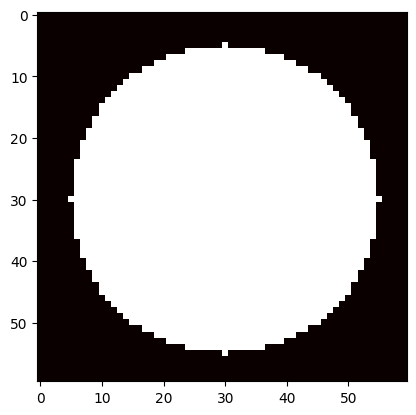

In [7]:

A = np.zeros((60, 60))+0j

A[Mesh['r']<0.2e-3] = 1

#DIsplay as heatmap
plt.imshow(np.abs(A), cmap='hot', interpolation='nearest')
plt.show()


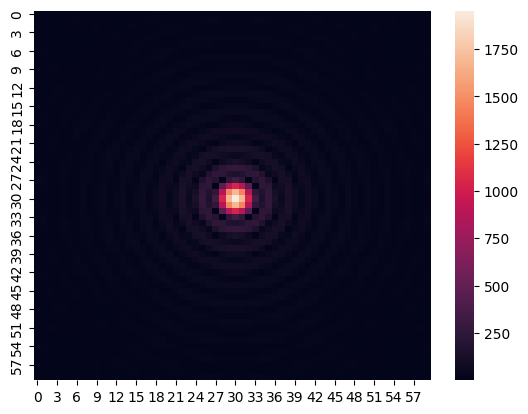

In [8]:
#Matrix Diffraction
ffx = np.exp(-2j * np.pi * Mesh['FX'].T*Mesh['X'])
ffy = np.exp(-2j * np.pi * Mesh['FY'].T*Mesh['Y'])
res = ffx@A@(ffy)

#plot seaborn heatmap
import seaborn as sns
sns.heatmap(np.abs(res))
plt.show()


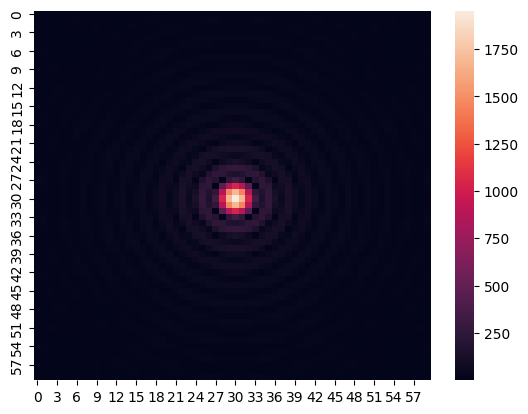

In [9]:
#Vectorized diffraction
#tensor product of the two matrices Fx and Fy
F = np.kron(ffx, ffy)
vecA = A.flatten()
res = F@vecA
res = res.reshape(60,60)
sns.heatmap(np.abs(res))
plt.show()


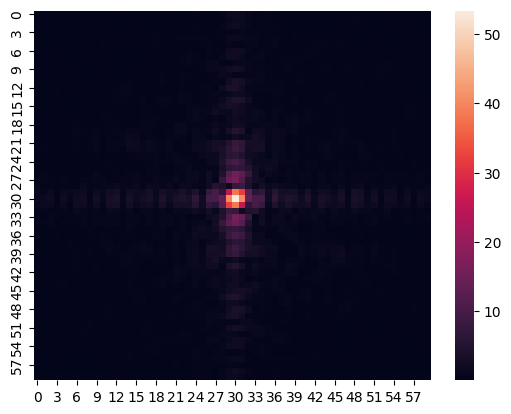

In [10]:
vec = norm_vec

# Diagonal phase matrix with random angles
D = lambda theta : np.diag(np.exp(1j*theta*2*np.pi))

#initialization of the diagonal matrix
# Diagonal_i = D(np.random.rand(3600))
# res_i = Diagonal_i@res_i

def Optical_layers(phases , vec):
    # 2 layered network
    #fourier transform and Diagonal Phase matrix
    #return D(phases[3600:7200])@(F@(D(phases[0:3600])@(F@vec)))  

    #1 layer Network
     return D(phases[0:3600])@(F@vec)

#random initialization of the phases
#phases = np.random.rand(7200)
phases = np.random.rand(3600)

#1 layer network output
res_f_1 = Optical_layers(phases,vec).reshape(60,60)
sns.heatmap(np.abs(res_f_1))
plt.show()

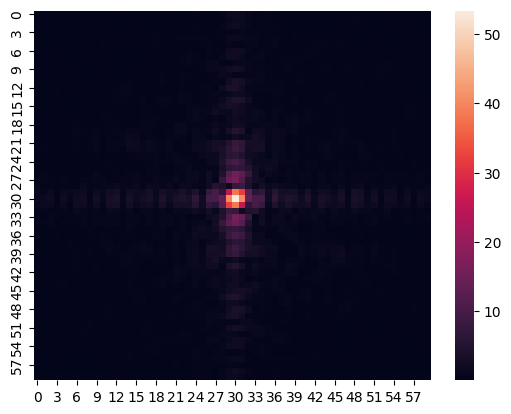

In [11]:
vec = norm_vec.flatten()
res_f_2 = Optical_layers(phases,vec).reshape(60,60)
#2 layer network output
sns.heatmap(np.abs(res_f_2))
plt.show()

In [12]:
#Cost function: Mean Squared Error between dog and cat
# def cost_function(phases):
#     return np.mean(np.abs(Optical_layers(phases,vec)-vec)**2)

# phases = np.random.rand(7200)
# #Cost function for the 1 layer network
# #Use of the scipy optimization library to minimize the cost function
# from scipy.optimize import minimize

# # Define a dictionary to store optimization progress
# optimization_progress = {"positions": [], "values": []}

# # Define a better callback function
# def enhanced_callback(x):
#     # Append the current position and the objective function value
#     optimization_progress["positions"].append(x.copy())  # Copy to avoid mutation issues
#     optimization_progress["values"].append(cost_function(x))

# # Perform the optimization with the enhanced callback
# res = minimize(cost_function, phases, method='L-BFGS-B', options={'disp': True, "maxiter" :2, "maxfun":2 }, callback=enhanced_callback)


# # Convert the stored positions to a numpy array for easier manipulation
# positions = np.array(optimization_progress["positions"])

# Plot the optimization path
# plt.figure(figsize=(8, 6))
# plt.contour(X, Y, Z, levels=50, cmap='viridis')
# plt.plot(positions[:, 0], positions[:, 1], 'r.-', label='Optimization Path')
# plt.scatter(*phases, color='blue', label='Start', zorder=5)
# plt.scatter(*res.x, color='green', label='End', zorder=5)
# plt.title('Optimization Process Visualization')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.colorbar(label='Objective Function Value')

# # Plot the objective function value over iterations
# plt.figure(figsize=(8, 6))
# plt.plot(optimization_progress["values"], 'bo-', label='Objective Function Value')
# plt.title('Objective Function Value Over Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Objective Function Value')
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# out = Optical_layers(res.x,vec)
# out = out.reshape(60,60)
# sns.heatmap(np.abs(out))
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'x'

Random input theta (first 10 values): [0.73179429 4.37563831 0.81467594 4.8007159  1.38779075 2.37145558
 2.57531319 4.4976366  6.14187013 3.63105814]
Extrapolated theta (first 10 values): [0.73179429 0.79152944 0.85126459 0.91099973 0.97073488 1.03047003
 1.09020518 1.14994033 1.20967547 1.26941062]
Extrapolated theta (last 10 values): [2.19985361 2.24088845 2.2819233  2.32295814 2.36399298 2.40502782
 2.44606266 2.4870975  2.52813234 2.56916718]
Length of extrapolated theta: 3600


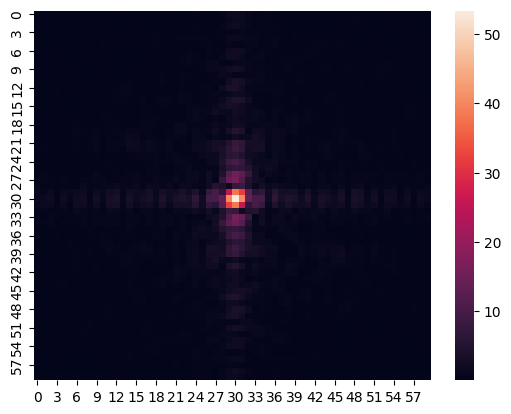

In [67]:

import numpy as np


def extrapolate_theta_from_60(theta=None):
    """
    Extrapolate a 60-element list of theta values in radians 
    to a list with 3600 elements. If no input theta is provided,
    generate random theta values in radians.
    
    Parameters:
        theta (list or array, optional): A 60-element list or array of theta values in radians.
                                         If None, 60 random values between 0 and 2π are generated.
        
    Returns:
        np.ndarray: A 3600-element list of extrapolated theta values in radians.
    """
    if theta is None:
        # Generate 60 random values between 0 and 2π
        theta = np.random.uniform(0, 2 * np.pi, 60)
    elif len(theta) != 60:
        raise ValueError("Input theta must be a list or array with exactly 60 elements.")
    
    # Original indices for the 60-element list
    X = np.linspace(0, 3599, 60)
    
    # New indices for the desired 3600 elements
    X_new = np.arange(3600)
    
    # Perform linear interpolation to fill the 3600 values
    theta_new = np.interp(X_new, X, theta)
    
    return theta, theta_new

# Use random theta values
theta_random, theta_3600 = extrapolate_theta_from_60()

# Check the result
print("Random input theta (first 10 values):", theta_random[:10])
print("Extrapolated theta (first 10 values):", theta_3600[:10])
print("Extrapolated theta (last 10 values):", theta_3600[-10:])
print("Length of extrapolated theta:", len(theta_3600))




#initialization of the diagonal matrix
# Diagonal_i = D(np.random.rand(3600))
# res_i = Diagonal_i@res_i

def Optical_layers(theta_3600, vec):
    # 2 layered network
    #fourier transform and Diagonal Phase matrix
    #return D(phases[3600:7200])@(F@(D(phases[0:3600])@(F@vec)))  
    D = np.diag(np.exp(1j*theta_3600))
    #1 layer Network
    return D@(F@vec)


#1 layer network output
res_f_1 = Optical_layers(theta_3600,vec).reshape(60,60)
sns.heatmap(np.abs(res_f_1))
plt.show()



In [68]:


#Cost function: Mean Squared Error between dog and cat
def cost_function(theta_3600):
     return np.mean(np.abs(Optical_layers(theta_3600,vec)-vec)**2)

# #Cost function for the 1 layer network
# #Use of the scipy optimization library to minimize the cost function
from scipy.optimize import minimize

# Store cost values during optimization
cost_history = []


# Define the callback function to print the cost function value
def callback(xk):
    """Callback function to print the cost function value."""
    current_cost = xk
    print(f"Current cost: {cost_function(current_cost)}")


# Use scipy minimize with callback
res = minimize(cost_function, theta_3600, method='L-BFGS-B', callback=callback, options={'disp': True, 'maxiter': 100})


# Print the result of the optimization
print("Optimization result:", res)

KeyboardInterrupt: 

In [69]:
x = np.array([1,2,3])